# Lecture 15 Exercises

In today's lecture, we will learn about ways to understand and quantify [the association between two variables](https://www.inferentialthinking.com/chapters/15/1/correlation.html).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

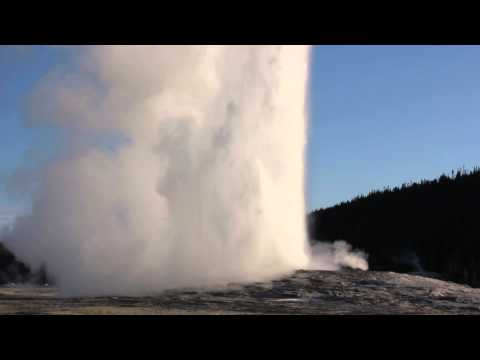

In [2]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it usually followed by an even longer wait before the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park in the meantime instead of waiting by the geyser. Today, we will use a dataset on eruption durations and waiting times to see how closely these variables are related - if there is a strong relationship, we should be able to predict one from the other. You’ll learn more about this method of prediction in lecture tomorrow.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes.
- `wait`: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [3]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


Let’s first look at our data to see whether we can visually identify a linear relationship, which is what the correlation coefficient measures.

**Question 1.1.** Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.

<!--
BEGIN QUESTION
name: q1_1
-->

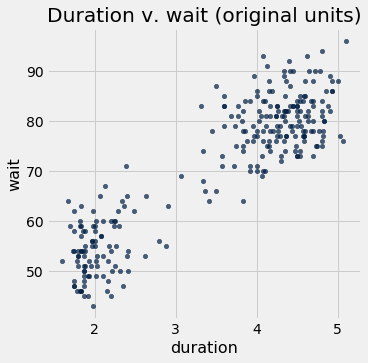

In [10]:
faithful.scatter('duration','wait')
plots.title('Duration v. wait (original units)');

**Question 1.2.** Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?

<!--
BEGIN QUESTION
name: q1_2
-->

*Based on the scatter plot above, the eruption duration and waiting time are roughly linearly related and the relationship is positive.*

We're going to continue with the assumption that they are linearly related, and quantify the strength of this linear relationship.

We'd next like to plot the data in standard units. If you don't remember the definition of standard units, textbook section [14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html#standard-units) might help!

**Question 1.3.** Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  The columns should be named `duration (standard units)` and `wait (standard units)`.

<!--
BEGIN QUESTION
name: q1_3
-->

In [11]:
duration_mean = np.mean(faithful.column('duration'))
duration_std = np.std(faithful.column('duration'))
wait_mean = np.mean(faithful.column('wait'))
wait_std = np.std(faithful.column('wait'))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column('duration') - duration_mean)/duration_std,
    "wait (standard units)", (faithful.column('wait') - wait_mean)/wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


**Question 1.4.** Plot the data again, but this time in standard units.

<!--
BEGIN QUESTION
name: q1_4
-->

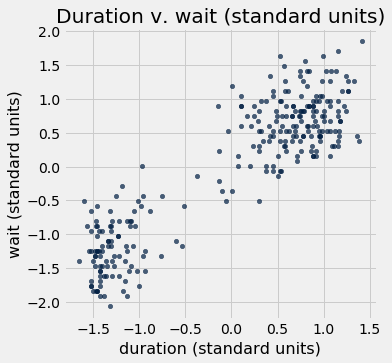

In [12]:
faithful_standard.scatter('duration (standard units)','wait (standard units)')
plots.title('Duration v. wait (standard units)');

You'll notice that this plot looks the same as the last one!  However, the data and axes are scaled differently.  So it's important to read the ticks on the axes.

**Question 1.5.** Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

1. -1
2. 0
3. 1

Assign `correlation` to the number corresponding to your guess.

<!--
BEGIN QUESTION
name: q1_5
-->

In [13]:
correlation = 3

**Question 1.6.** Compute the correlation `r`.  

*Hint:* Use `faithful_standard`.  Section [15.1](https://www.inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.


<!--
BEGIN QUESTION
name: q1_6
-->

In [14]:
r = np.mean(faithful_standard.column(0) * faithful_standard.column(1))
r

0.9008111683218132

# Cheese and Doctorates

We’ll now investigate the relationship between two unusual variables. For every year between 2000 and 2009 (inclusive), we have data on the per-capita consumption of mozzarella cheese in that year and the number of civil engineering doctorates awarded in that year. These are real data from the U.S. Department of Agriculture and the National Science Foundation.

We can perform the same process that we performed above to investigate whether there is an association between the cheese consumption in a certain year and the number of civil engineering degrees awarded in that year. Just because we can do something, though, doesn’t mean it is meaningful. While you carry out the following process, think about whether the analysis you are performing is meaningful or not.

**Question 2.1.** Run the next cell to load in the dataset

<!--
BEGIN QUESTION
name: q2_1
-->

In [15]:
cheese_doctors = Table().with_columns(
    "Cheese Consumption", make_array(9.3, 9.7, 9.7, 9.7, 9.9, 10.2, 10.5, 11, 10.6, 10.6),
    "Civil Engineering Doctorates", make_array(480, 501, 540, 552, 547, 622, 655,701, 712, 708))
cheese_doctors

Cheese Consumption,Civil Engineering Doctorates
9.3,480
9.7,501
9.7,540
9.7,552
9.9,547
10.2,622
10.5,655
11,701
10.6,712
10.6,708


**Question 2.2.** Let’s visually inspect the relationship in the table. Make a scatter plot which displays mozzarella cheese consumption on the x-axis, and number of Civil Engineering degrees on the y-axis.

<!--
BEGIN QUESTION
name: q2_2
-->

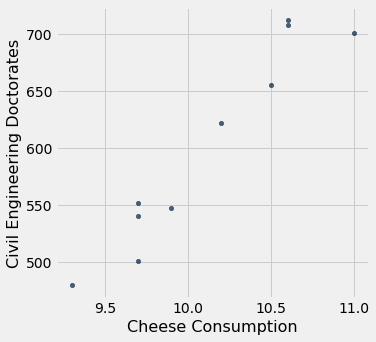

In [16]:
cheese_doctors.scatter('Cheese Consumption', 'Civil Engineering Doctorates')

**Question 2.3.** Write a function called correlation_from_table that takes as arguments the name of a table and the names of two columns which contain numerical values. The function should return the correlation coefficient (a single number) between the two variables.

<!--
BEGIN QUESTION
name: q2_3
-->

In [17]:
def correlation_from_table(table, col_x, col_y):
    data_x = table.column(col_x)
    data_y = table.column(col_y)
    standard_units_x = (data_x - np.mean(data_x))/np.std(data_x)
    standard_units_y = (data_y - np.mean(data_y))/np.std(data_y)
    correlation = np.mean(standard_units_x * standard_units_y)
    return correlation

**Question 2.4.** Call your correlation_from_table function on cheese_doctors to find the correlation coefficient between the two variables.

<!--
BEGIN QUESTION
name: q2_4
-->

In [18]:
correlation_from_table(cheese_doctors, 'Cheese Consumption', 'Civil Engineering Doctorates')

0.9586477872804794

You should have found a strong correlation (close to 1) between the two variables. But how should we interpret this value?

**Question 2.5.** Does the high degree of linear association between these two variables tell us anything about a causal relationship between mozzarella cheese consumption and civil engineering doctorates? If we knew the amount of mozzarella cheese eaten per capita in 2010, would it make sense to try to use this to predict the number of civil engineering graduates in that year?

<!--
BEGIN QUESTION
name: q2_5
-->

*It tells us that there's a positive correctlation relationship between the two variables. However, we couldn't use this to predict the number of civil engineering graduates number.*

What you’ve just seen is an example of a spurious correlation, in which a relationship between two variables is purely due to chance. There are many such examples at https://www.tylervigen.com/spurious-correlations, where we found these data. This is an amusing website to spend a few minutes on, and it serves as a reminder that we should not use correlation as justification or evidence that two variables are related in a mechanistic or causal way. As you’ve probably heard before, “correlation does not imply causation.”

The example above is silly, and makes this statement seem obvious, but it can be dangerous to forget the difference between a correlative link and a causal link.

Now, let’s investigate another situation when it’s important to recognize the limitations of correlations. Run the next cell to load a mystery dataset.

In [19]:
mystery = Table.read_table("mystery.csv")
mystery

x,y
5.31801,220.445
-46.9561,2011.91
20.5586,60.7178
-25.1235,1797.85
16.6883,-267.489
-83.7817,7357.47
-8.96097,1077.6
-43.0446,1953.85
31.4746,2446.56
-3.85866,411.589


**Question 2.6.** We’ll start by committing a sin against data science: we’ll start calculating correlation before investigating our data. In the following cell, assign mystery_correlation to the value of the correlation coefficient between the two variables in the mystery table.

<!--
BEGIN QUESTION
name: q2_6
-->

In [20]:
mystery_correlation = correlation_from_table(mystery, 'x','y')
mystery_correlation

-0.024711531764254033

**Question 2.7.** Based on the value of the correlation, what can we can say about the relationship between x and y?

<!--
BEGIN QUESTION
name: q2_7
-->

*There exists a negative correclation relationship between x and y.*

**Question 2.8.** Now let’s see why it’s valuable to investigate our data visually first. Create a scatter plot of the data in the mystery table.

<!--
BEGIN QUESTION
name: q2_8
-->

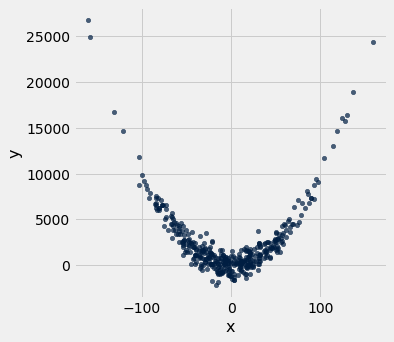

In [21]:
mystery.scatter('x','y')

**Question 2.9.** What do you see? Is there a linear relationship between x and y? Is there some other kind of relationship? Why did we get the value for the correlation coefficient that we got? Discuss your answers with a neighbor or TA, then summarize below.

<!--
BEGIN QUESTION
name: q2_8
-->

*It isn't a linear relationship between x and y but a vertex relationship.*